# Movie Recommendation System

*Nancy Jain, Abhay Agrawal, Sakshi Arora*

---

With the rapid advancement in technology, the digital content provider would want to engage more users and users would want to enhance their entertainment. So, a movie recommendation system would fulfil all these needs by suggesting a movie to the user on the basis of his mood or the current choice of his movie.
Thus we aim to develop a good ***movie recommendation system*** to help user find the right movie for him!

Netflix, Facebook, Youtube, Amazon and many other tech companies use recommendation systems to increase their business and profits.
![alt text](https://i.ibb.co/2vmQJN0/1-Y-QG3-Kvfk0f-Sn-Cir-LBHZ7w.jpg)

---
Data is taken from [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) which is curated from Full MovieLens Dataset. The Movies Dataset comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

---
We implemented 3 types of Recommender Systems:


> **1. Generalized Recommendation Model**: It gives same recommendation to each user based on movie popularity or genre. The idea is that the movies which are popular and critically acclaimed have high chances of being liked by an audience.



> **2. Content Based Recommendation Model**: The suggestions are given on the basis of a particular movie. If a user is currently watching movie X, then X's metadata like genre, actors, description, keywords etc are used to further suggest movies. This recommender system works on the assumption that if a user liked movie X, then he would also like movies similar to X. 

> **3. Collaborative FIltering based Recommendation System**: This technique is used to personalise recommendations to a user based on his interests. CF techniques basically find correlation between user's interests and a movie's features and on its basis recommendes a personalised movie.










### Mount To drive & Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/DataScience Project/the-movies-dataset/

/content/drive/My Drive/DataScience Project/the-movies-dataset


In [0]:
ls

 BestFeatureVector.csv    Errors1.csv    links_small.csv
 cosSimScore.csv          Errors-S.csv   movies_metadata.csv
 credits.csv              keywords.csv   ratings.csv
'Customer Feedback.csv'   links.csv      ratings_small.csv


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ast import literal_eval
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

### Functions

In [0]:
def name_number(n,c,ttl):
    name = n[:15]
    perc = c[:15]
    y_pos = np.arange(len(name))    
    plt.barh(y_pos, perc) 
    plt.yticks(y_pos, name)
    plt.xlabel("Occourence")
    plt.title("Analysis of top-15 "+ttl)
    plt.show()

In [0]:
def wrdCloud(d): #ref:https://www.geeksforgeeks.org/generating-word-cloud-python/
    comp=''
    for k in d:
        comp+=k+' '
    wordcloud = WordCloud(width = 1024, height = 1024,background_color ='white',min_font_size = 15).generate(comp)
    plt.figure(figsize = (20, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.show()

In [0]:
def calc_imdb_score(mergedData):
  num_of_votes = mergedData['vote_count']
  rating = mergedData['vote_average']
  A = num_of_votes / (num_of_votes + min_votes)
  B = min_votes / (num_of_votes+min_votes)
  return (A*rating + B*C)

In [0]:
def cnt(df,col):
    dfData = pd.DataFrame(df[col])
    dfData = dfData.explode(col)
    x=dfData[col].value_counts().index
    y=dfData[col].value_counts()
    return x,y

In [0]:
def pieChart(x,y):
    plt.pie(y,labels=x,autopct='%1.1f%%',startangle=90,pctdistance=0.7,radius = 2.5)
    plt.legend(loc=2)
    plt.show()

In [0]:
def recommendation(df,title,n):
    idx = df.loc[df.title == title].index[0]
    cosSimScore = dict()
    score = cosine_sim[idx]
    i=0
    for j in score:
        cosSimScore[i]=j
        i+=1
    sortedScore = sorted(cosSimScore.items(), key=lambda x: x[1],reverse=True) #Sorting in decreasing order on the basis of similarity score
    topScores = sortedScore[1:n+1]
    movies = [i[0] for i in topScores]
    return list(df.title.iloc[movies])

### Read Data

In [0]:
metadata = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*'movies_metadata.csv'* had following set of attributes:
adult, belongs_to_collection, budget, genres, homepage, id, imdb_id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, video, vote_average, vote_count

*'keywords.csv'* had following set of attributes:
id, keywords

Merging these 2 files on column: id

SneakPeak of the dataset we will work on is:

In [0]:
# We need to merge metadata and keywords dataFiles.
# ID is object in metadata whereas float in keywords.
# Thus converting float type to object type in metadata.
keywords.id = keywords.id.apply(str)
mergedData = metadata.merge(keywords,on='id')
mergedData.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [0]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46482 entries, 0 to 46481
Data columns (total 25 columns):
adult                    46482 non-null object
belongs_to_collection    4557 non-null object
budget                   46482 non-null object
genres                   46482 non-null object
homepage                 7986 non-null object
id                       46482 non-null object
imdb_id                  46465 non-null object
original_language        46471 non-null object
original_title           46482 non-null object
overview                 45487 non-null object
popularity               46478 non-null object
poster_path              46083 non-null object
production_companies     46478 non-null object
production_countries     46478 non-null object
release_date             46394 non-null object
revenue                  46478 non-null float64
runtime                  46214 non-null float64
spoken_languages         46478 non-null object
status                   46396 non-null objec

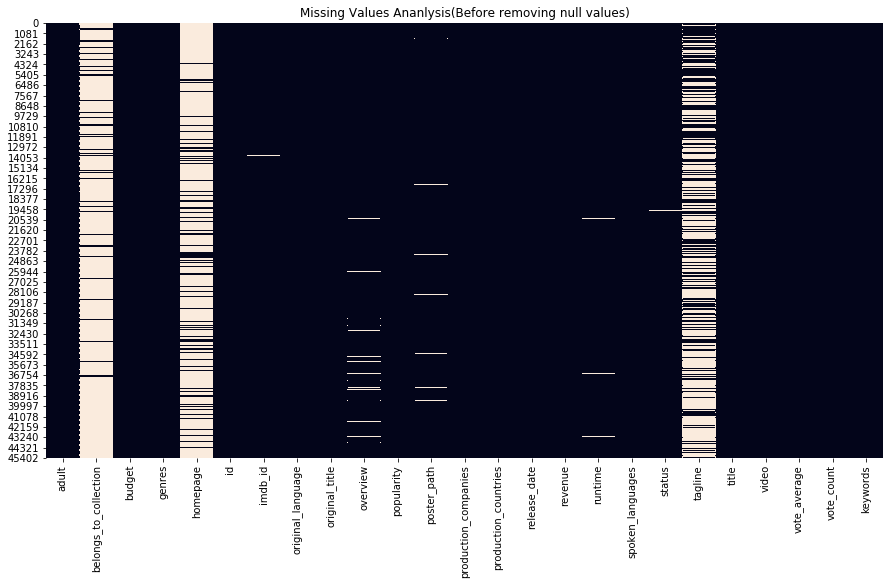

In [0]:
plt.figure(figsize=(15,8))
plt.title('Missing Values Ananlysis(Before removing null values)')
sns.heatmap(mergedData.isnull(), cbar=False) #Visualising missing data correspondind to each feature
plt.show()

As it can be seen from above heatmap, the dataset has many null values. 

For the 3 columns: belongs_to_collection, homepage, tagline majority of the data is null. Thus these columns were dropped from the dataset

Remaining rows which contained null values were also dropped.

In [0]:
# Dropping Columns with null values >20,000
mergedData.drop(['tagline', 'belongs_to_collection','homepage'], axis=1, inplace=True)

In [0]:
# Dropping rows with null values
mergedData = mergedData.dropna()
mergedData.id = mergedData.id.astype(int) #Converting id to int type
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45013 entries, 0 to 46481
Data columns (total 22 columns):
adult                   45013 non-null object
budget                  45013 non-null object
genres                  45013 non-null object
id                      45013 non-null int64
imdb_id                 45013 non-null object
original_language       45013 non-null object
original_title          45013 non-null object
overview                45013 non-null object
popularity              45013 non-null object
poster_path             45013 non-null object
production_companies    45013 non-null object
production_countries    45013 non-null object
release_date            45013 non-null object
revenue                 45013 non-null float64
runtime                 45013 non-null float64
spoken_languages        45013 non-null object
status                  45013 non-null object
title                   45013 non-null object
video                   45013 non-null object
vote_average    

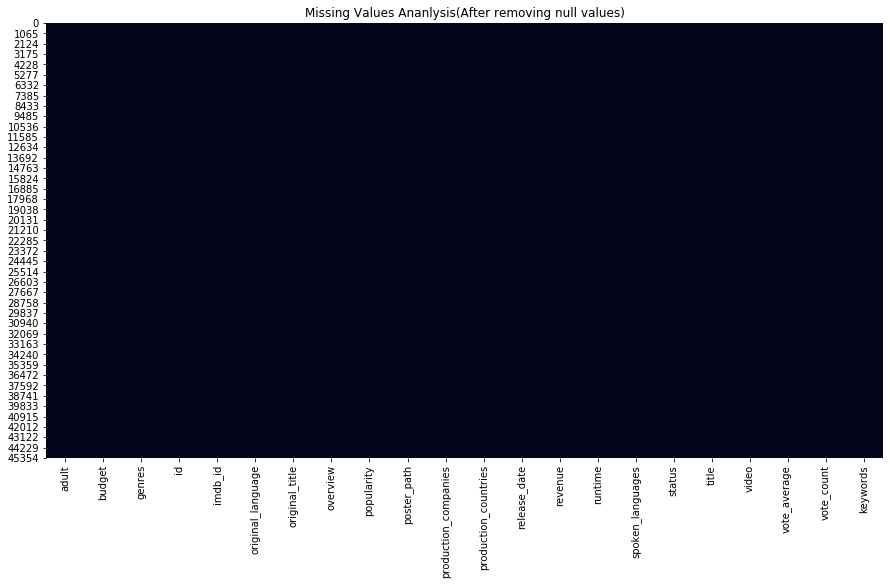

In [0]:
plt.figure(figsize=(15,8))
plt.title('Missing Values Ananlysis(After removing null values)')
sns.heatmap(mergedData.isnull(), cbar=False) #Visualising missing data correspondind to each feature
plt.show()

### Data Cleaning

As the above dataframe shows, for majority of the columns, the data is present in structure form with id and other details for each component. We do not need all these extra information to fulfil our aim. Thus, in the following section, the necessary and required part of information is fetched from these structures and stored in form of list.

Here, all the values are in string form. The type of values were changed as per requirement. Like, release_date was converted to date-time format, popularity, vote_average, vote_count were converted to float type.

In [0]:
mergedData['genres'] = mergedData['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mergedData['production_companies'] = mergedData['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mergedData['production_countries'] = mergedData['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mergedData['keywords'] = mergedData['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
mergedData['spoken_languages'] = mergedData['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [0]:
mergedData['popularity'] = mergedData.popularity.astype(float)
mergedData['release_date'] = pd.to_datetime(mergedData['release_date'], dayfirst=True)
mergedData['vote_average'] = mergedData.vote_average.astype(float)
mergedData['vote_count'] = mergedData.vote_count.astype(float)

In [0]:
mergedData.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,keywords
0,False,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,Toy Story,False,7.7,5415.0,"[jealousy, toy, boy, friendship, friends, riva..."
1,False,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,False,6.9,2413.0,"[board game, disappearance, based on children'..."
2,False,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Grumpier Old Men,False,6.5,92.0,"[fishing, best friend, duringcreditsstinger, o..."
3,False,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Waiting to Exhale,False,6.1,34.0,"[based on novel, interracial relationship, sin..."
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Father of the Bride Part II,False,5.7,173.0,"[baby, midlife crisis, confidence, aging, daug..."


### Data Analysis

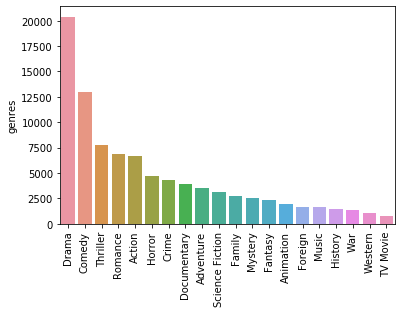

In [0]:
# # Analyzing genre data
x,y = cnt(mergedData,'genres')
sns.barplot(x,y)
plt.xticks(rotation=90)
plt.show()

The above graph shows the various genres corresponding to which we have movies in the dataset. It can be seen that Most of the movies are of type 'Drama' and the least movie data is belonging to type 'TV Movie'. Even for the least famous genre, we have >700 data points in the dataset.

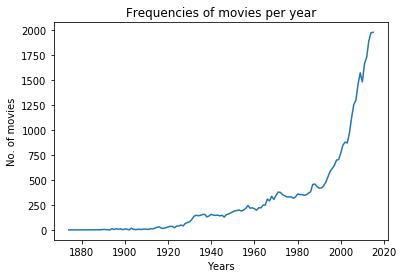

In [0]:
#Analyse the release dates of movies in the data
releaseDatesData = pd.DataFrame(mergedData.release_date)
releaseDatesData['release_year'] = releaseDatesData['release_date'].dt.year
year_data = pd.DataFrame(releaseDatesData.release_year.value_counts().reindex(releaseDatesData.release_year.unique()))
year_data = year_data.sort_index()
x = year_data.index.tolist()[:-4]
y = year_data.values.tolist()[:-4]
y = [i for [i] in y]
plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('No. of movies')
plt.title('Frequencies of movies per year')
plt.show()

The above graph shows frequency of movies over years. It can be seen that majority data we have is of the latest year. This is also because the number of movies being released each year has increased drastically from 1880 to 2019.

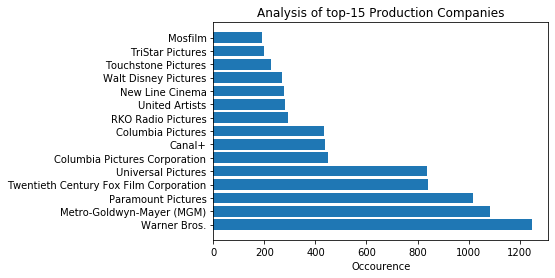

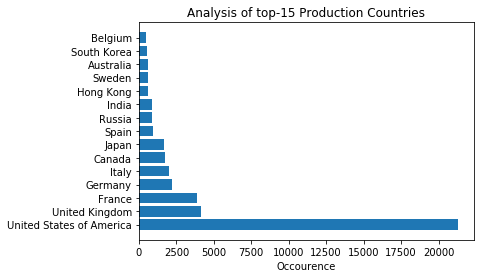

In [0]:
# Analysis of Production Countries and Production Companies
prodCompNames,prodCompOccur = cnt(mergedData,'production_companies')
prodCountNames,prodCountOccur = cnt(mergedData,'production_countries')

name_number(prodCompNames,prodCompOccur,'Production Companies')

name_number(prodCountNames,prodCountOccur,'Production Countries')

The Analysis of top 15 production companies shows that most of the top compaies like *Warner Bros*, *MGM*, *Paramount Pictures* etc belong to US. This is also cross verified by the Analysis of top 15 production countries where a large percentage of movies in the dataset were produced by production countries of United States of America.


Word Cloud for different genres in the dataset



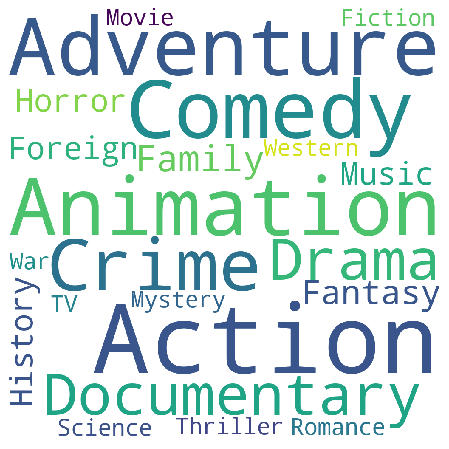

In [0]:
#Finding unique Genres in the dataset

C = mergedData['vote_count'].mean()
min_votes = mergedData['vote_count'].quantile(0.50)
qualified = mergedData[(mergedData['vote_count'] >=min_votes)][['title', 'genres', 'release_date', 'vote_count', 'vote_average', 'popularity']]

qualified['imdb_scores'] = qualified.apply(calc_imdb_score, axis=1)
qualified = qualified.sort_values('imdb_scores', ascending=False).head(250)
qualified.index = range(len(qualified))

genres = qualified['genres'].to_list()
flatten_genres = list(chain.from_iterable(genres))
x = np.array(flatten_genres) 
unique_genres = list(np.unique(x)) 

print('\nWord Cloud for different genres in the dataset\n')
wrdCloud(unique_genres)


Word Cloud for top 150 keywords spotted in the dataset



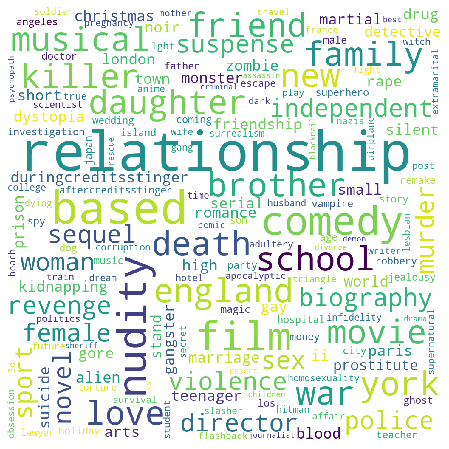

In [0]:
keywordsNames,keywordsOccur = cnt(mergedData,'keywords')

print('\nWord Cloud for top 150 keywords spotted in the dataset\n')
wrdCloud(keywordsNames[:150])

In [0]:
#Creating genre vs Movie Dictionary
genre_dict = dict()
for j in unique_genres:
  for i in range(len(qualified)):
    if(j in qualified.genres.tolist()[i]):
      if(j in genre_dict):
        genre_dict[j].append(qualified.title.tolist()[i])
      else:
        genre_dict[j] = [qualified.title.tolist()[i]]

# for k,v in genre_dict.items():
#   print(k,v)

### Type 1: Generalised Recommendation Model

This is the baseline Model on whose basis further models will be evaluated. 

If the user is a new user and we have no data of user using which further recommendations can be made, then this generalised model can come to rescue. The user can view the top trending movies currently on the basis of votes given by users. If the user has specific mood, then the top trending movies can also be viewed genre-wise.


Metric to rate the movie is calculated as follows:
 
*   Since each movie has different number of voters, we need to take weighted rating.
*   It is found by IMDB’s Weighted Rating Formula:

![alt text](https://cdn1.imggmi.com/uploads/2019/11/29/fdfae8112a6e9c7c60f1a15899573e92-full.png)

Here, 
v=Number of votes for a movie

m=Minimum Votes required to be listed in the chart

R=Average Rating of the movie

C=Mean vote across the report


In [0]:
cont='y'
while(cont=='y'):
    opt = int(input("Welcome to our movie recommendation system............\nHow you want to proceed? Choose Option\n1.Find most popular movies.\n2.Find most popular movies by genre\n"))
    if(opt==1):
        c=1
        print('List of popular movies.....\n')
        for i in qualified.title:
            if(c==21):
                break
            print(c,i)
            c+=1
    elif(opt==2):
        print('Presenting before you list of genres. Please choose anyone genres\n')
        c=1
        for i in unique_genres:
            print(c,i)
            c+=1
        print()
        sel = int(input('Enter genre number: '))
        print('\nTop movies of your preffered genres are as follows: ')
        d=1
        for i in genre_dict[unique_genres[sel-1]]:
            if(d==21):
                break
            print(d,i)
            d+=1
    print()
    cont=input('Do you want to continue?(y/n)')

Welcome to our movie recommendation system............
How you want to proceed? Choose Option
1.Find most popular movies.
2.Find most popular movies by genre
1
List of popular movies.....

1 As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty
2 Miss Saigon: 25th Anniversary
3 Seven Beauties
4 Rick and Morty: State of Georgia Vs. Denver Fenton Allen
5 Tosun Pasha
6 Behemoth
7 Pretty Sweet
8 The Thin Yellow Line
9 Sky Ladder: The Art of Cai Guo-Qiang
10 Unity
11 Gore Vidal: The United States of Amnesia
12 Glass
13 Cheatin'
14 John Waters: This Filthy World
15 Winnie the Pooh and Tigger Too
16 I Am Not Madame Bovary
17 Kiler-ów 2-óch
18 Jim Jefferies: Contraband
19 All Watched Over by Machines of Loving Grace
20 Björk: Biophilia Live

Do you want to continue?(y/n)n


> Customer Feedback



Customer Feedback on Generalised Recommendation system


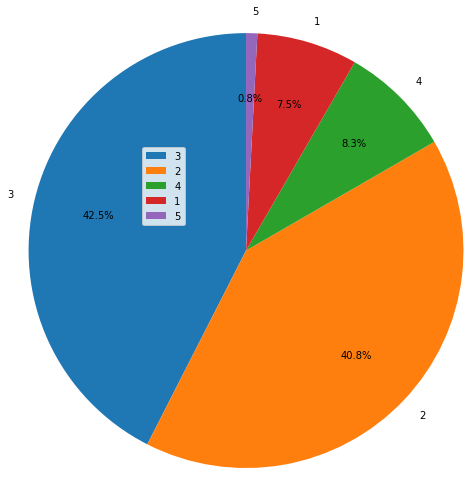

In [0]:
fdbck = pd.read_csv('Customer Feedback.csv')
feedDistri = fdbck['How well did you like recommendations from first recommender?'].value_counts()
print('Customer Feedback on Generalised Recommendation system')
# sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(feedDistri)
x = feedDistri.index
y = feedDistri.values
pieChart(x,y)

### Type II : Content Based Movie Recommendation

The recommendations are made on the basis of content of a movie datapoint. A user who likes movie X and wishes to see similar movie, the cosine similarity between movie X and all other movies in the dataset is found and the movies which are maximum in similarity with X are recommended to the user.

Vector for each movie was formed by considering cast & crew member names,keywords, popularity, voting, production company, language as vocabulary.

User enters name of a movie which he likes and similar movies are recommended to him based on cosine similarity.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Pw4tpWp/content-1.jpg" alt="content-1" border="0"></a>

Cosine Similarity is found using the formula:

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Hx8BY7S/similarity.png" alt="similarity" border="0"></a>

Here A and B are vectors of movies whose similarity we need to find.

In [0]:
lnks = pd.read_csv('links_small.csv')
tmdbId = lnks['tmdbId'].dropna().astype(int) #dropping null rows and convert tmdbId to int from float

subMergedData = mergedData[mergedData.id.isin(tmdbId)] #Picking up common rows from metadata.csv and links_small.csv
subMergedData.index = range(len(subMergedData)) 

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidfVector = tf.fit_transform(subMergedData['overview'])
cosine_sim = cosine_similarity(tfidfVector, tfidfVector)

c='y'
while(c=='y' or  c=='Y'):
    ttl = input('Enter Movie Title: ')
    n = int(input('Enter number of movie suggestions you want to see: '))
    print('\nFollowing are the list of top '+str(n)+' similar movies: ')
    movies = recommendation(subMergedData,ttl,n)
    z=1
    for i in movies:
        print(z,i)
        z+=1
    c = input('\nDo you want to continue?(y/n): ')

Enter Movie Title: Jumanji
Enter number of movie suggestions you want to see: 10

Following are the list of top 10 similar movies: 
1 Wreck-It Ralph
2 Guardians of the Galaxy
3 Night of the Living Dead
4 eXistenZ
5 The Giant Spider Invasion
6 Pixels
7 Stay Alive
8 Gamer
9 Peter Pan
10 Zathura: A Space Adventure

Do you want to continue?(y/n): n


>  Customer Feedback

Customer Feedback on Content Based system


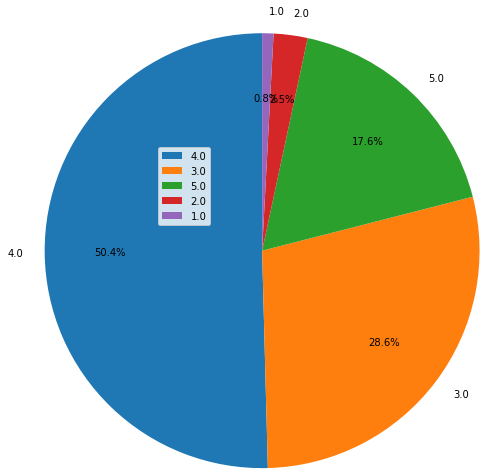

In [0]:
print('Customer Feedback on Content Based system')
feedDistri = fdbck['How well did you like recommendations from second recommender?'].value_counts()
x = feedDistri.index
y = feedDistri.values
pieChart(x,y)